# Volatility
[1 - Link Tutorial](https://blog.quantinsti.com/volatility-and-measures-of-risk-adjusted-return-based-on-volatility/)


[*********************100%***********************]  1 of 1 completed
                    Open          High           Low         Close  \
Date                                                                 
2021-08-12  38815.640625  39373.210938  37358.152344  37857.078125   
2021-08-13  37866.796875  40547.597656  37739.468750  40514.828125   
2021-08-14  40529.550781  40774.023438  39145.519531  39924.835938   
2021-08-15  39924.597656  40145.375000  38638.546875  39890.167969   
2021-08-16  39867.238281  40689.136719  38807.207031  39058.035156   
2021-08-17  39000.281250  40059.113281  38036.660156  38170.503906   
2021-08-18  38163.156250  39276.835938  37875.078125  38282.078125   
2021-08-19  38231.402344  40219.839844  37677.210938  40011.644531   
2021-08-20  40016.390625  42170.960938  39941.078125  42168.417969   
2021-08-21  42158.074219  42504.074219  41303.062500  41810.281250   
2021-08-22  41779.175781  42299.710938  41207.093750  42166.070312   
2021-08-23  42140.441

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

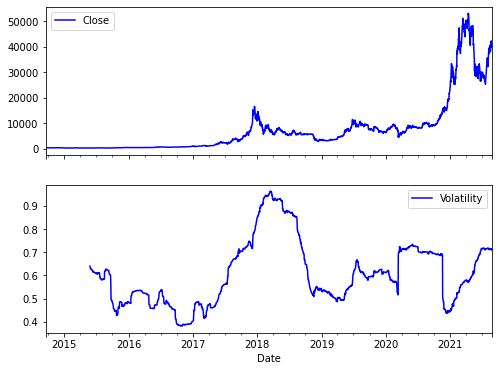

In [3]:
# Load the required modules and packages
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf
symbol = 'BTC-EUR'

# Pull STOCK data from Yahoo finance 
STOCK = yf.download(symbol,start='2013-1-1', end='2021-8-27')

# Compute the logarithmic returns using the Closing price 
STOCK['Log_Ret'] = np.log(STOCK['Close'] / STOCK['Close'].shift(1))

# Compute Volatility using the pandas rolling standard deviation function
STOCK['Volatility'] = STOCK['Log_Ret'].rolling(window=252).std() * np.sqrt(252)
print(STOCK.tail(15))

# Plot the NIFTY Price series and the Volatility
STOCK[['Close', 'Volatility']].plot(subplots=True, color='blue',figsize=(8, 6))

In [4]:
import numpy as np
# Sharpe Ratio
def sharpe(returns, rf, days=252):
    volatility = returns.std() * np.sqrt(days)
    sharpe_ratio = (returns.mean() - rf) / volatility
    return sharpe_ratio

# information Ratio
def information_ratio(returns, benchmark_returns, days=252):
    return_difference = returns - benchmark_returns
    volatility = return_difference.std() * np.sqrt(days)
    information_ratio = return_difference.mean() / volatility
    return information_ratio

# Modigliani Ratio
def modigliani_ratio(returns, benchmark_returns, rf, days=252):
    volatility = returns.std() * np.sqrt(days)
    sharpe_ratio = (returns.mean() - rf) / volatility
    benchmark_volatility = benchmark_returns.std() * np.sqrt(days)
    m2_ratio = (sharpe_ratio * benchmark_volatility) + rf
    return m2_ratio